In [1]:
!pip install wurlitzer
%load_ext wurlitzer

In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

from numba import cuda
import numba
import math
import time

# 1 - lire l'image :

> Indented block



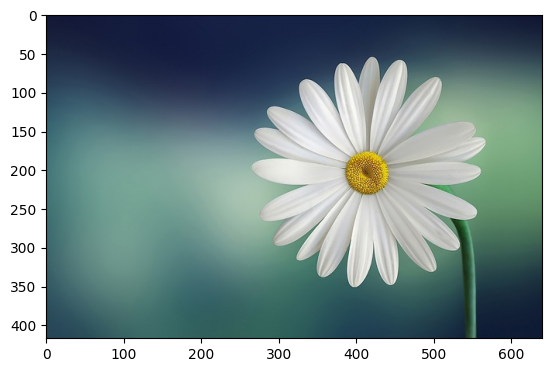

In [5]:
# Path to the image in your Google Drive
image_path = "./pop.jpg"
# Open the image using Pillow
image = Image.open(image_path)

# Display the image
plt.imshow(image)


In [6]:
# Convert the Pillow image to a NumPy array
image_array = np.array(image)
#image_array

In [7]:
@cuda.jit
def process_image_cuda(image_array, result_array):
    pos_i, pos_j = cuda.grid(2)

    if pos_i < image_array.shape[0] and pos_j < image_array.shape[1]:
        # Get RGB values for the current pixel
        R = image_array[pos_i, pos_j, 0]
        G = image_array[pos_i, pos_j, 1]
        B = image_array[pos_i, pos_j, 2]

        # Calculate grayscale value using the given formula
        grayscale_value = 0.3 * R + 0.59 * G + 0.11 * B

        # Assign the grayscale value to all three channels in the result array
        result_array[pos_i, pos_j, 0] = grayscale_value
        result_array[pos_i, pos_j, 1] = grayscale_value
        result_array[pos_i, pos_j, 2] = grayscale_value

In [8]:
def process_image(image):
    result_image = np.zeros_like(image, dtype=np.float32)

    threadsperblock = (16, 16)
    blockspergrid_x = math.ceil(image.shape[0] / threadsperblock[0])
    blockspergrid_y = math.ceil(image.shape[1] / threadsperblock[1])
    blockspergrid = (blockspergrid_x, blockspergrid_y)

    d_input = cuda.to_device(image)
    d_output = cuda.to_device(result_image)

    process_image_cuda[blockspergrid, threadsperblock](d_input, d_output)

    d_output.copy_to_host(result_image)

    return result_image.astype(np.uint8)



array([[[24, 24, 24],
        [25, 25, 25],
        [25, 25, 25],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [22, 22, 22]],

       [[24, 24, 24],
        [25, 25, 25],
        [25, 25, 25],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [22, 22, 22]],

       [[25, 25, 25],
        [25, 25, 25],
        [25, 25, 25],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [22, 22, 22]],

       ...,

       [[62, 62, 62],
        [62, 62, 62],
        [62, 62, 62],
        ...,
        [27, 27, 27],
        [27, 27, 27],
        [27, 27, 27]],

       [[62, 62, 62],
        [62, 62, 62],
        [62, 62, 62],
        ...,
        [26, 26, 26],
        [26, 26, 26],
        [26, 26, 26]],

       [[61, 61, 61],
        [61, 61, 61],
        [62, 62, 62],
        ...,
        [27, 27, 27],
        [27, 27, 27],
        [27, 27, 27]]], dtype=uint8)

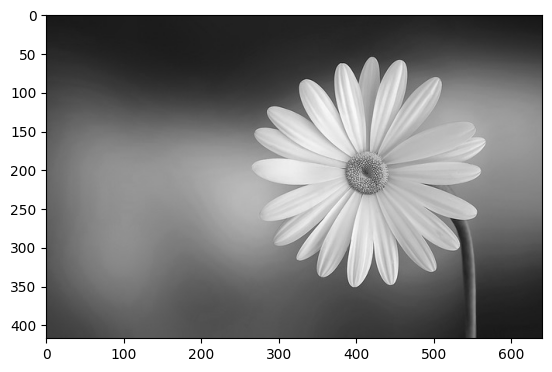

In [9]:
output_image = process_image(image_array)

# Display the image
plt.imshow(output_image)
output_image